# 🏆 Visualizing the History of Nobel Prize Winners
The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.


The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.




**Executive Summary:**
In this Exploratory Data Analysis (EDA) project, I investigated the historical dataset of Nobel Prize winners from 1901 to 2023. Using `pandas`, `matplotlib`, and `seaborn`, I analyzed demographic trends, geographic distributions, and the evolution of gender representation across different prize categories over the decades.

---

## 1. Data Loading & Initial Inspection
First, let's import the necessary libraries and load the Nobel Prize dataset to understand its structure, features, and data types.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

nobel = pd.read_csv('datasets/nobel.csv')
print(nobel.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

## 2. Demographic Analysis: Gender Distribution

The first question we want to answer is: **What is the most commonly awarded gender?**

By evaluating the `sex` column, we can see a historical disparity (approx. 90.5% male vs. 6.5% female). However, we also notice around 3% of missing values. Before moving forward, it is crucial to investigate these nulls to ensure data integrity. As demonstrated below, these missing values actually represent institutions and organizations that won the prize (e.g., Red Cross, UNHCR), rather than individuals.

In [4]:
print(nobel['sex'].value_counts())

Male      905
Female     65
Name: sex, dtype: int64


In [5]:
# Investigating null values in the 'sex' column
print(nobel[nobel['sex'].isnull()]['full_name'])

24     Institut de droit international (Institute of ...
60     Bureau international permanent de la Paix (Per...
89     Comité international de la Croix Rouge (Intern...
200    Office international Nansen pour les Réfugiés ...
215    Comité international de la Croix Rouge (Intern...
237                Friends Service Council (The Quakers)
238     American Friends Service Committee (The Quakers)
283    Office of the United Nations High Commissioner...
348    Comité international de la Croix Rouge (Intern...
349    Ligue des Sociétés de la Croix-Rouge (League o...
366              United Nations Children's Fund (UNICEF)
399           International Labour Organization (I.L.O.)
479                                Amnesty International
523    Office of the United Nations High Commissioner...
558    International Physicians for the Prevention of...
588                   United Nations Peacekeeping Forces
659     Pugwash Conferences on Science and World Affairs
682       International Campaig

### 2.1. Visualizing Gender Distribution
To better illustrate this disparity, let's plot the absolute number of Nobel Prizes awarded by gender.

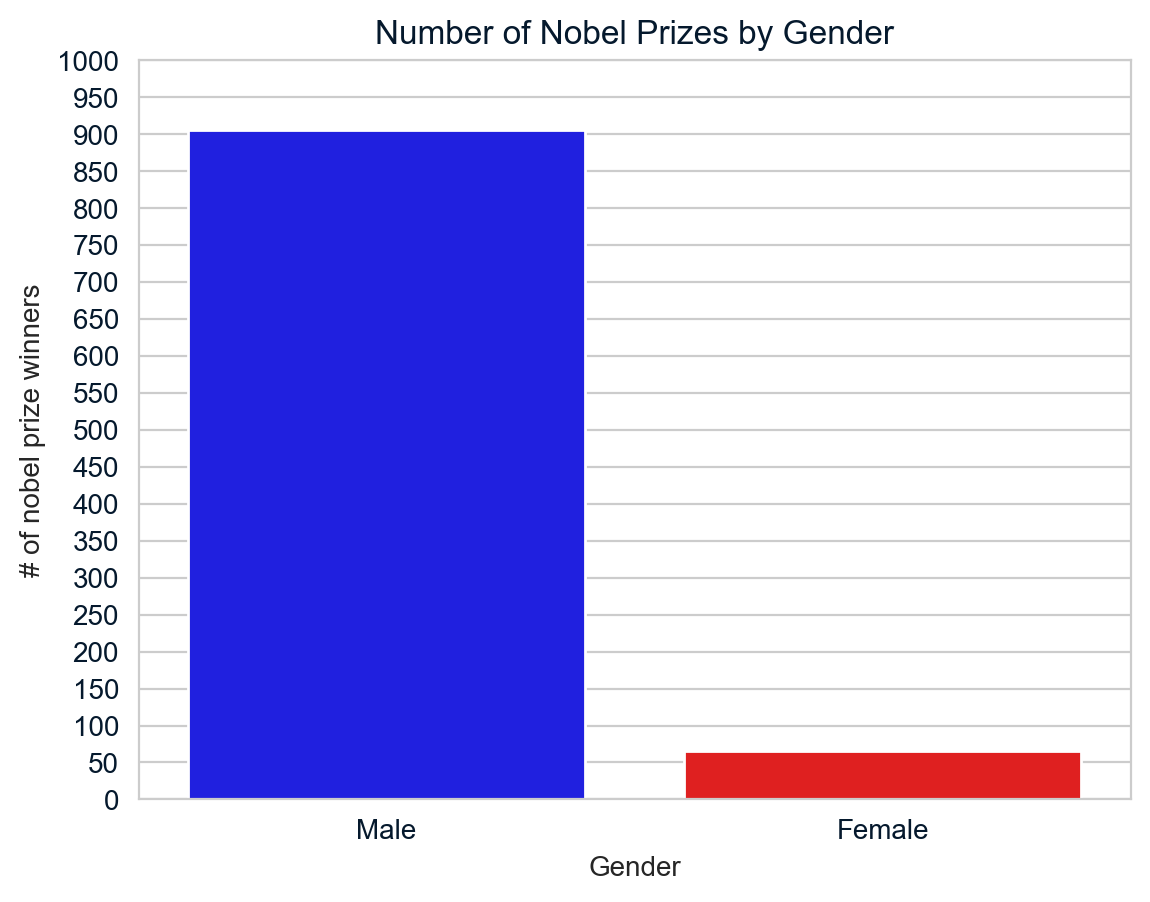

In [323]:
palette_colors = {"Male": "blue","Female": "Red"}
ticks = range(0,1001, 50)
sns.set_style("whitegrid")
g = sns.countplot(x = "sex", data  = nobel,palette = palette_colors)
g.set_xlabel("Gender")
g.set_yticks(ticks)
g.set_ylabel("# of nobel prize winners")
g.set_title("Number of Nobel Prizes by Gender") 
plt.show()


The visualization starkly highlights the historical gender gap in the Nobel Prize history. The overwhelming majority of laureates are male , emphasizing the systemic barriers women faced in academia and recognized fields over the last century.

## 3. Geographic Distribution: Top Awarded Countries

Next, let's investigate the geographic origins of the laureates: **What is the most commonly awarded birth country?**

After identifying the leading country, we will extract the top 10 most awarded birth countries and visualize them using a bar chart.

In [7]:
print(nobel['birth_country'].value_counts().sort_values(ascending =False))

United States of America                        291
United Kingdom                                   91
Germany                                          67
France                                           58
Sweden                                           30
                                               ... 
Taiwan                                            1
Tuscany (Italy)                                   1
Madagascar                                        1
Prussia (Russia)                                  1
French protectorate of Tunisia (now Tunisia)      1
Name: birth_country, Length: 129, dtype: int64


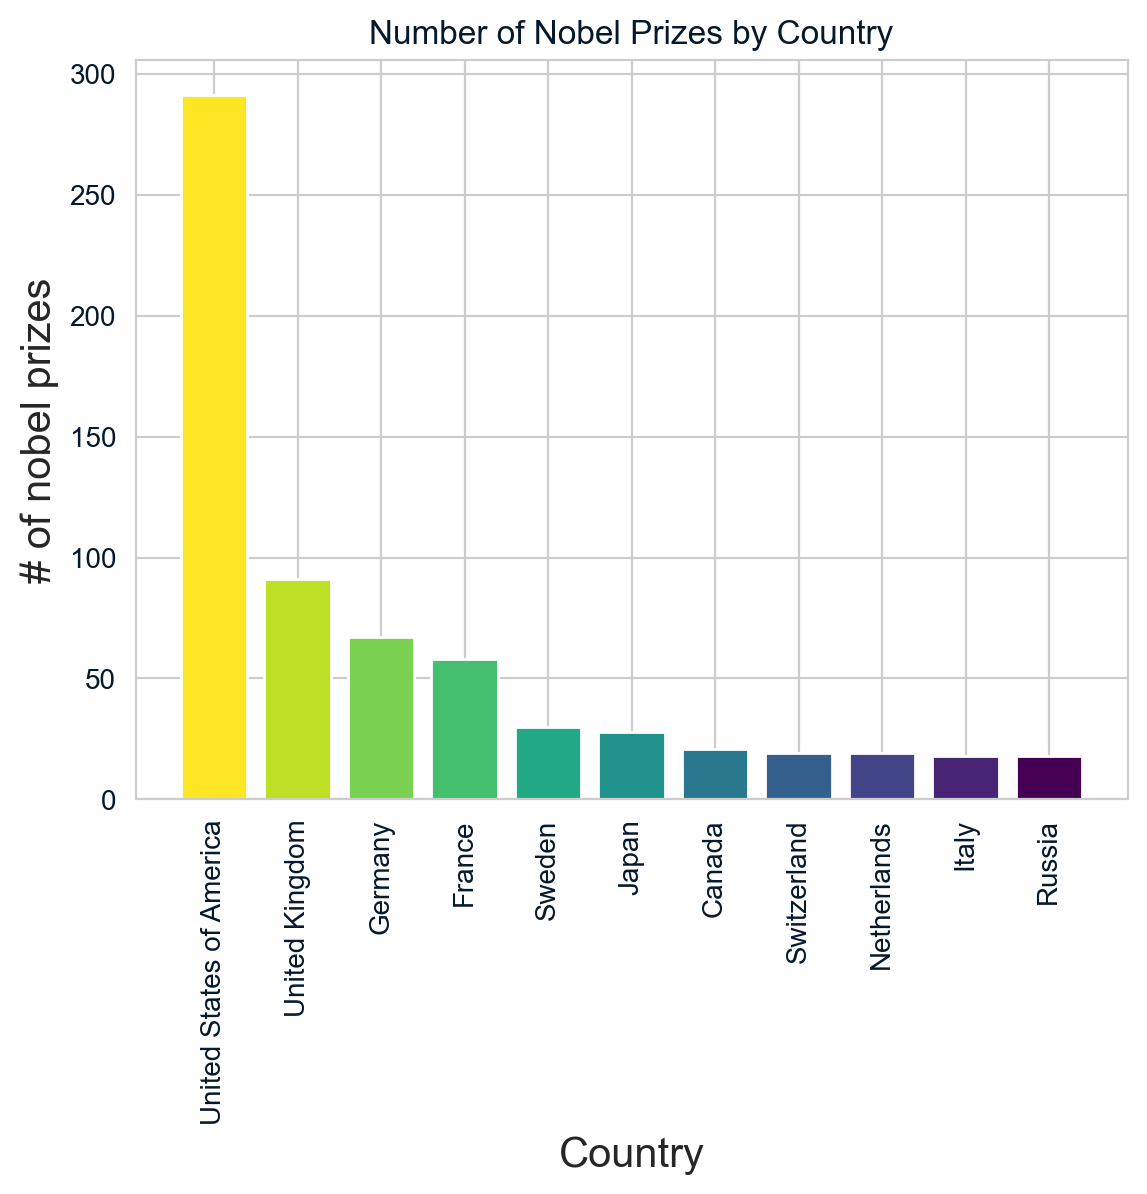

In [325]:

fig , ax = plt.subplots()
colors = plt.get_cmap('viridis')(np.linspace(1, 0, 11))                             
top_10 = nobel['birth_country'].value_counts().sort_values(ascending =False)[:11]
ax.bar(top_10.index,top_10, color = colors)
ax.set_xticklabels(top_10.index, rotation = 90)
ax.set_xlabel("Country",size = 15)
ax.set_ylabel("# of nobel prizes",size = 15)
ax.set_title("Number of Nobel Prizes by Country") 
plt.show()

The United States emerges as the absolute leader in Nobel laureates  followed by major European nations like the United Kingdom, Germany, and France. This reflects the historical concentration of scientific funding, prestigious universities, and research infrastructure in these regions.

## 4. The Rise of US Dominance Over Time

To understand historical shifts, let's analyze the data by decades. The goal is to determine: **Which decade had the highest ratio of US-born Nobel Prize winners compared to total winners across all categories?**

First, we need to perform some feature engineering by creating a new `decade` column. Then, we can calculate the ratio of US winners against the total prizes distributed in each respective period.

In [8]:

#first, let's create a decade column
nobel['decade'] = (nobel['year'] // 10) * 10
#now let's see how many prizes were distributed each decade
print(nobel.groupby(['decade'])['prize'].count())

decade
1900     57
1910     40
1920     54
1930     56
1940     43
1950     72
1960     79
1970    104
1980     97
1990    104
2000    123
2010    121
2020     50
Name: prize, dtype: int64


### 4.1. Visualizing the Trend
To properly understand the US dominance, we need to look at three metrics over time:
1. The absolute number of Nobel Prizes awarded globally per decade.
2. The absolute number of US-born winners per decade.
3. The percentage (ratio) of US winners relative to the total.

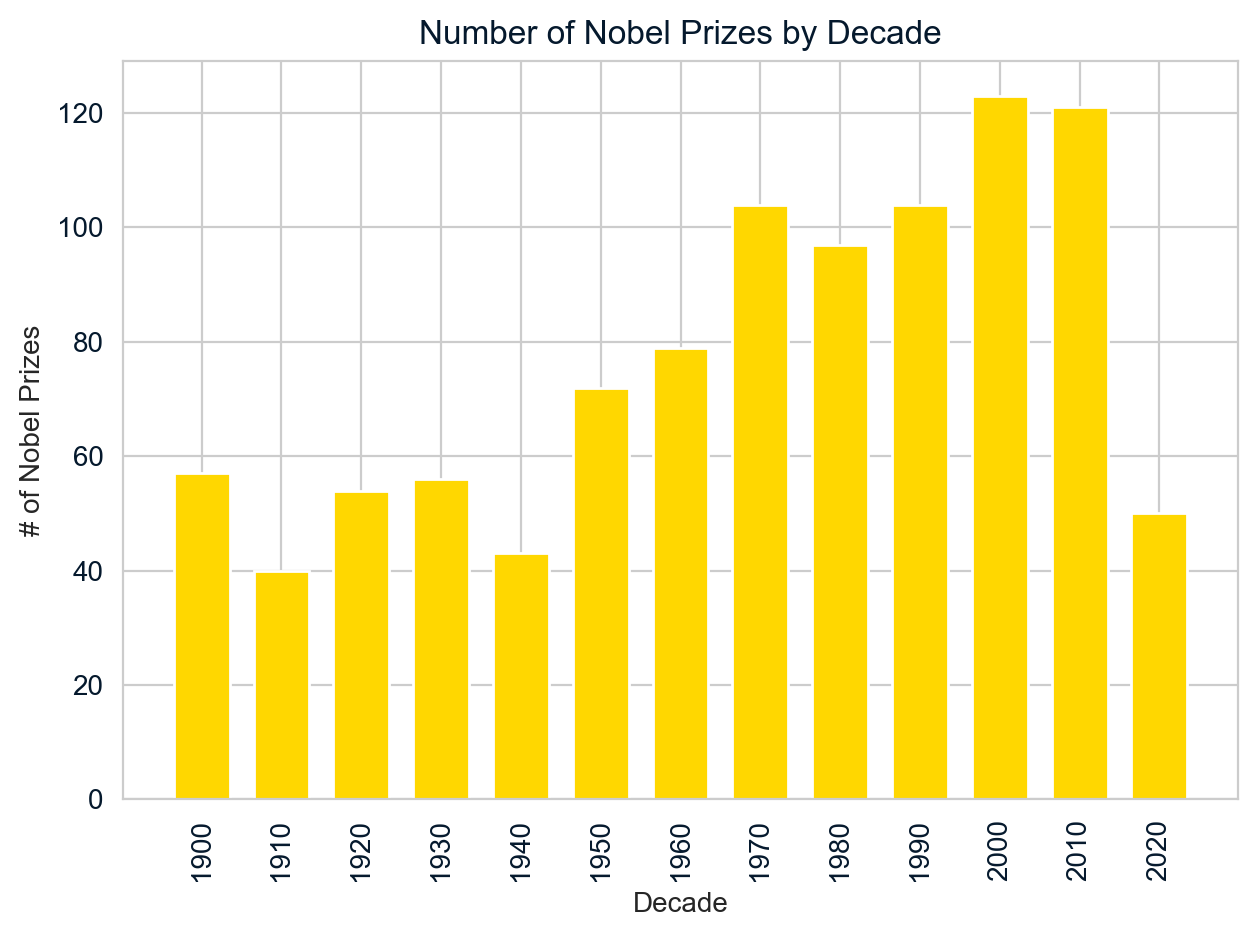

In [327]:
fig2 , ax2 = plt.subplots()
prizes = nobel.groupby(['decade'])['prize'].count()
ax2.bar(prizes.index, prizes, width=7, color='gold') 
ax2.set_xticks(prizes.index) 
ax2.set_xticklabels(prizes.index, rotation=90) 
ax2.set_xlabel("Decade")
ax2.set_ylabel("# of Nobel Prizes")
ax2.set_title("Number of Nobel Prizes by Decade") 
plt.tight_layout()
plt.show()

In [328]:
#Now let's see how many prizes Usa win in each decade
print(nobel[nobel['birth_country'] == 'United States of America'].groupby(['decade'])['prize'].count())


decade
1900     1
1910     3
1920     4
1930    14
1940    13
1950    21
1960    21
1970    33
1980    31
1990    42
2000    52
2010    38
2020    18
Name: prize, dtype: int64


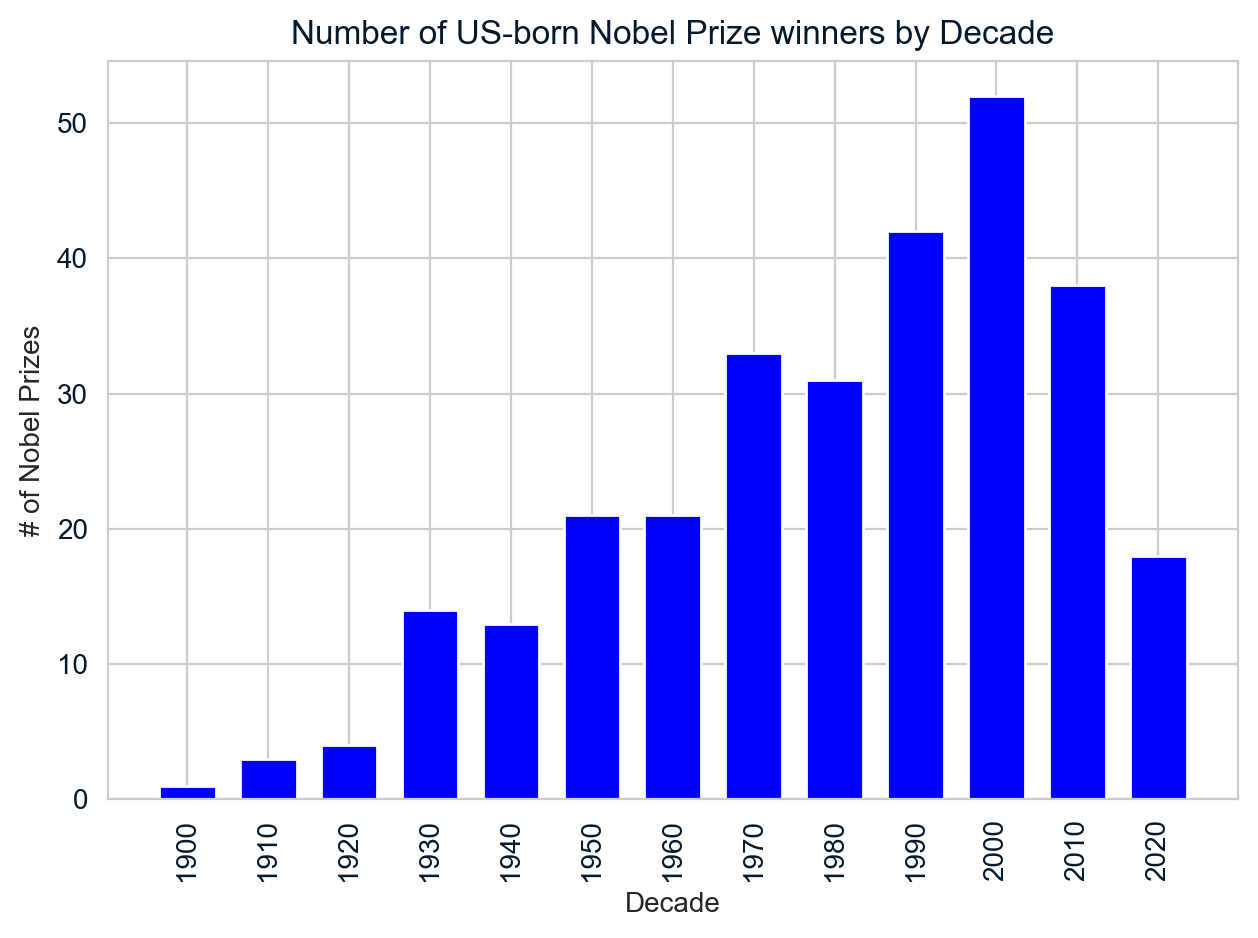

In [329]:
fig3 , ax3 = plt.subplots()
prize_USA = nobel[nobel['birth_country'] == 'United States of America'].groupby(['decade'])['prize'].count()
ax3.bar(prize_USA.index, prize_USA, width=7, color='blue') 
ax3.set_xticks(prize_USA.index) 
ax3.set_xticklabels(prize_USA.index, rotation=90) 
ax3.set_xlabel("Decade")
ax3.set_ylabel("# of Nobel Prizes")
ax3.set_title("Number of US-born Nobel Prize winners by Decade") 
plt.tight_layout()
plt.show()

In [330]:
#lets calculate the percentage by dividing the second one for the first one
print((nobel[nobel['birth_country'] == 'United States of America'].groupby(['decade'])['prize'].count()/nobel.groupby(['decade'])['prize'].count() *100).sort_values(ascending = False))
#The decade with the highest ratio of US-born Nobel Prize winner was 2000


decade
2000    42.276423
1990    40.384615
2020    36.000000
1980    31.958763
1970    31.730769
2010    31.404959
1940    30.232558
1950    29.166667
1960    26.582278
1930    25.000000
1910     7.500000
1920     7.407407
1900     1.754386
Name: prize, dtype: float64


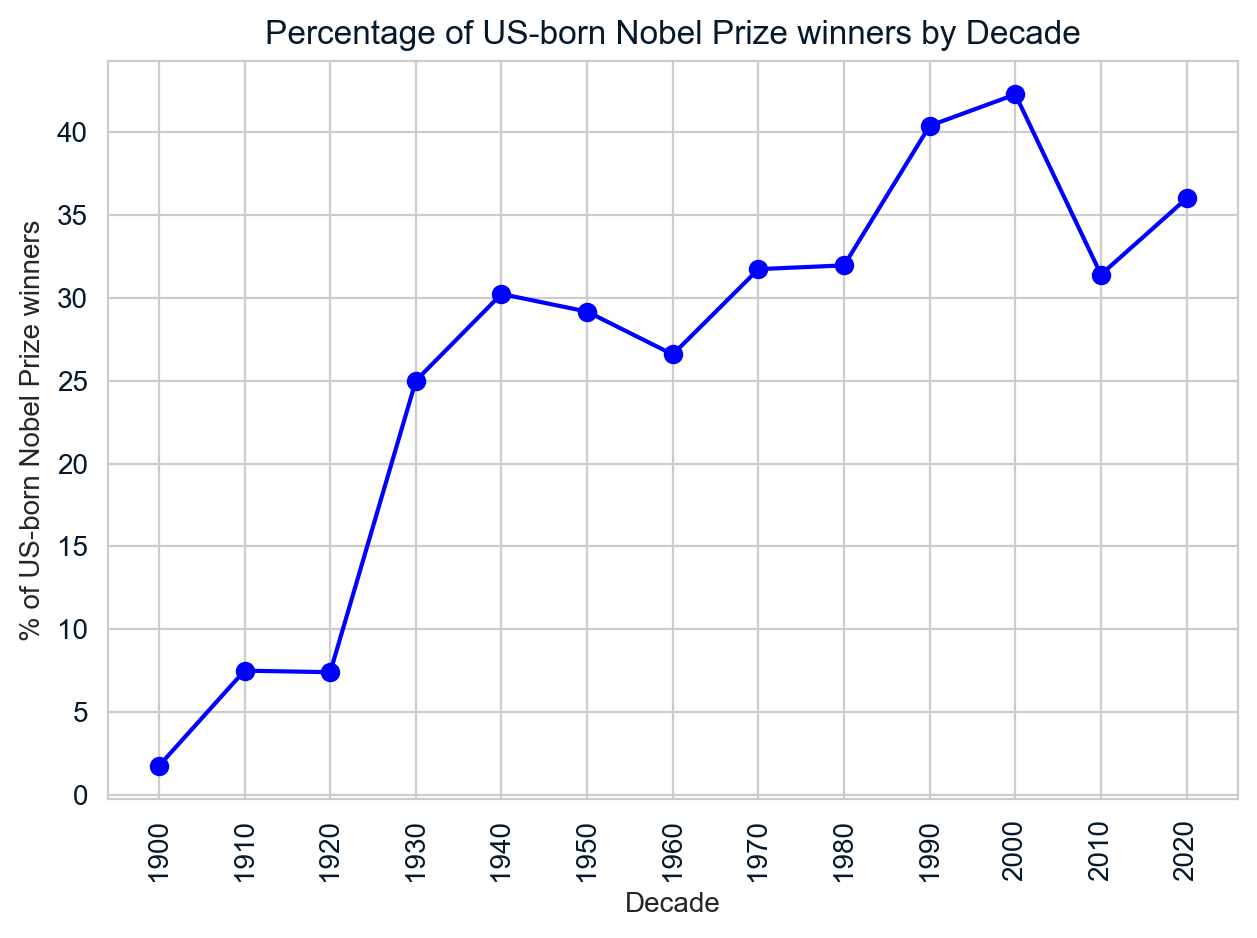

In [331]:
fig4 , ax4 = plt.subplots()
pct_USA =nobel[nobel['birth_country'] == 'United States of America'].groupby(['decade'])['prize'].count()/nobel.groupby(['decade'])['prize'].count() *100
ax4.plot(pct_USA.index, pct_USA, color='blue', marker = 'o') 
ax4.set_xticks(pct_USA.index) 
ax4.set_xticklabels(pct_USA.index, rotation=90) 
ax4.set_xlabel("Decade")
ax4.set_ylabel("% of US-born Nobel Prize winners")
ax4.set_title("Percentage of US-born Nobel Prize winners by Decade") 
plt.tight_layout()
plt.show()

The line chart reveals a fascinating historical trend. Before World War II, the US share of Nobel Prizes was relatively low. However, we see a massive, steady climb starting in the 1930s and 1940s, peaking in the 2000s, where the US claimed over 50% of all Nobel Prizes awarded in that decade.

## 5. Female Representation by Category and Decade

Finally, let's look at the intersection of gender, time, and field of study: **Which decade and Nobel Prize category combination had the highest proportion of female laureates?**

To answer this, we will group the data by both `category` and `decade`, filtering specifically for female winners, and calculate their percentage relative to the total winners in those exact subgroups.

In [332]:

print('Number of prizes', '\n')

print(nobel.groupby(['category','decade'])['prize'].count(), '\n')

print('Number of women winners', '\n')
#now let's filter to have only women gender
print(nobel[nobel['sex']== 'Female'].groupby(['category','decade'])['prize'].count(), '\n')
#now lets calculate the portion (percentage)
print('% of women winners', '\n')
print((nobel[nobel['sex']== 'Female'].groupby(['category','decade'])['prize'].count()/nobel.groupby(['category','decade'])['prize'].count()).sort_values(ascending = False))


Number of prizes 

category   decade
Chemistry  1900       9
           1910       8
           1920      10
           1930      13
           1940       9
                     ..
Physics    1980      22
           1990      22
           2000      28
           2010      26
           2020      12
Name: prize, Length: 72, dtype: int64 

Number of women winners 

category    decade
Chemistry   1910      1
            1930      1
            1960      1
            2000      1
            2010      1
            2020      3
Economics   2000      1
            2010      1
            2020      1
Literature  1900      1
            1920      2
            1930      1
            1940      1
            1960      1
            1990      3
            2000      3
            2010      3
            2020      2
Medicine    1940      1
            1970      1
            1980      3
            1990      1
            2000      4
            2010      2
            2020      1
Peace       19

### 5.1. Highlighting the Top Combinations
Now, we will convert our grouped series into a structured DataFrame to extract the top 11 combinations of category and decade where women had the highest representation. We will also create a combined `kind` column for easier reading.

In [333]:
pct_Women = (nobel[nobel['sex']== 'Female'].groupby(['category','decade'])['prize'].count()/nobel.groupby(['category','decade'])['prize'].count()) *100
#Let's transform the series in a dataframe
pct_Women = pct_Women.reset_index().sort_values('prize',ascending = False)
top_women = pct_Women[:11]
top_women['kind'] = top_women['category'] + ' - ' + top_women['decade'].astype(str)
print(top_women)
max_female_dict = {2020:'Literature'}

      category  decade      prize               kind
32  Literature    2020  50.000000  Literature - 2020
57       Peace    2010  35.714286       Peace - 2010
31  Literature    2010  30.000000  Literature - 2010
30  Literature    2000  30.000000  Literature - 2000
12   Chemistry    2020  30.000000   Chemistry - 2020
29  Literature    1990  30.000000  Literature - 1990
58       Peace    2020  28.571429       Peace - 2020
53       Peace    1970  23.076923       Peace - 1970
22  Literature    1920  20.000000  Literature - 1920
55       Peace    1990  17.647059       Peace - 1990
24  Literature    1940  16.666667  Literature - 1940


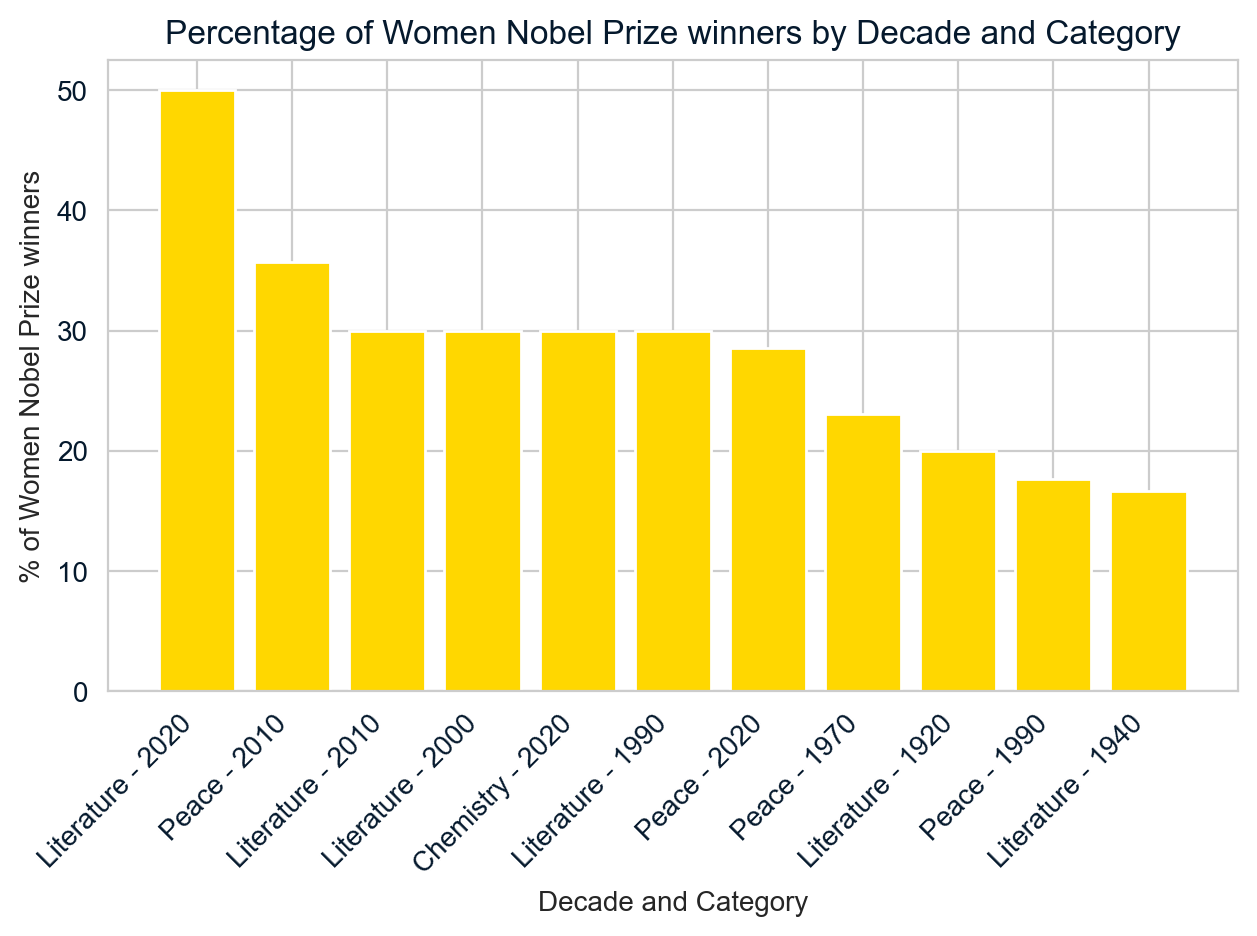

In [334]:
fig5 , ax5 = plt.subplots()
ax5.bar(top_women['kind'], top_women['prize'] , color='gold') 
ax5.set_xticks(top_women['kind']) 
ax5.set_xticklabels(top_women['kind'], rotation=45, ha = 'right') 
ax5.set_xlabel("Decade and Category")
ax5.set_ylabel("% of Women Nobel Prize winners")
ax5.set_title("Percentage of Women Nobel Prize winners by Decade and Category") 
plt.tight_layout()
plt.show()

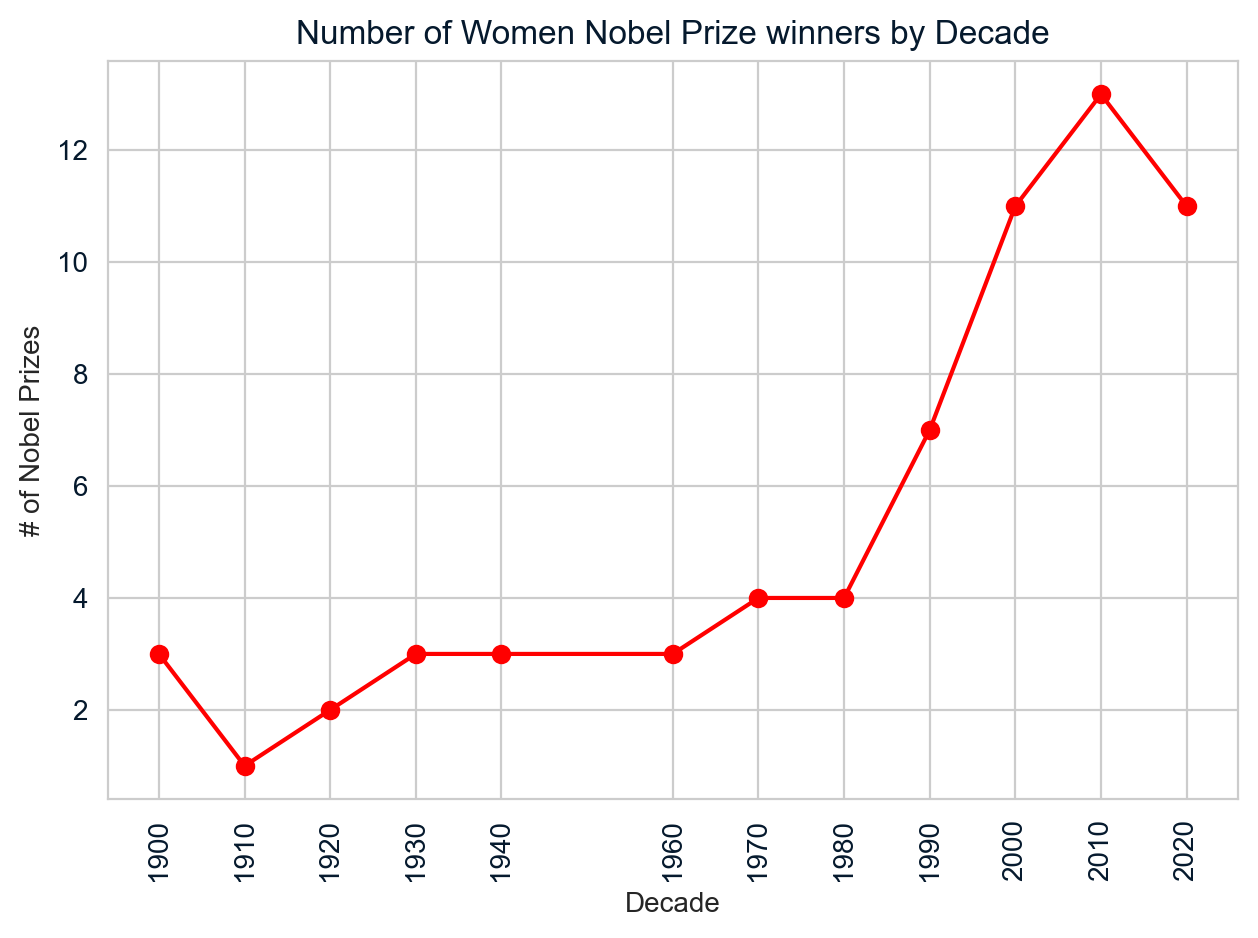

In [336]:
fig7 , ax7 = plt.subplots()
woman_prizes = first_woman.groupby('decade')['prize'].count()
ax7.plot(woman_prizes.index, woman_prizes, color='r', marker = 'o') 
ax7.set_xticks(woman_prizes.index) 
ax7.set_xticklabels(woman_prizes.index, rotation=90) 
ax7.set_xlabel("Decade")
ax7.set_ylabel("# of Nobel Prizes")
ax7.set_title("Number of Women Nobel Prize winners by Decade") 
plt.tight_layout()
plt.show()


By analyzing the highest proportions of female laureates, we can see that the most significant breakthroughs occurred very recently (e.g., Literature in the 2020s, with `max_female_dict = {2020: 'Literature'}`). 




# **Key Takeaways from this EDA:**
- **Gender:** The Nobel Prize history is heavily male-dominated, though female representation shows slight improvements in recent decades, particularly in fields like Literature and Peace.
- **Geography:** The United States holds a commanding lead, a trend that accelerated significantly post-WWII and peaked in the 2000s.